In [7]:
!pip install seaborn==0.9.0

import seaborn as sns
print(sns.__version__)

0.9.0


# Analisando as notas em geral

In [8]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [9]:
notas.shape

(43084, 4)

In [10]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [11]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [12]:
notas['nota'].value_counts()

4.0    11781
3.0     8533
5.0     6093
3.5     5408
4.5     4055
2.0     3085
2.5     1990
1.0     1131
1.5      535
0.5      473
Name: nota, dtype: int64

In [13]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.5669506081143814
Mediana 4.0


In [14]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

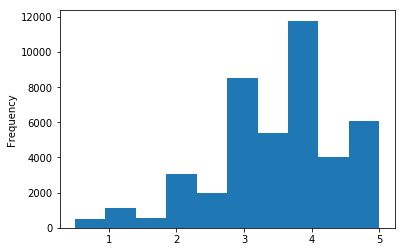

In [15]:
notas.nota.plot(kind='hist')

In [16]:
notas.nota.describe()

count    43084.000000
mean         3.566951
std          1.022535
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

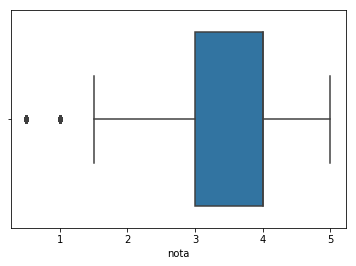

In [17]:
import seaborn as sns

sns.boxplot(notas.nota)

# Olhando os filmes

In [18]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


# Analisando algumas notas especificas por filme

In [20]:
notas.query("filmeId==1").nota.mean()

3.897196261682243

In [21]:
notas.query("filmeId==2").nota.mean()

3.3666666666666667

In [22]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

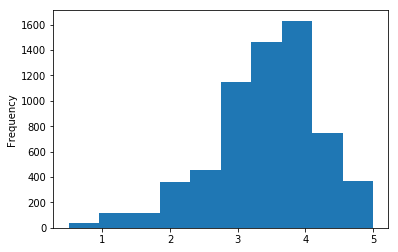

In [23]:
medias_por_filme.plot(kind='hist')

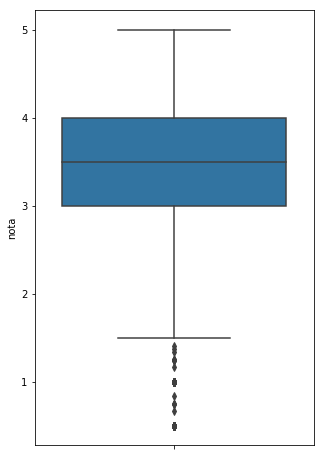

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [25]:
medias_por_filme.describe()

count    6433.000000
mean        3.436251
std         0.853154
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

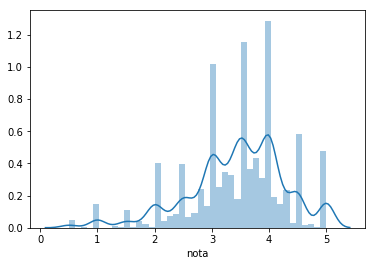

In [26]:
sns.distplot(medias_por_filme)

Text(0.5,1,'Histograma das médias dos filmes')

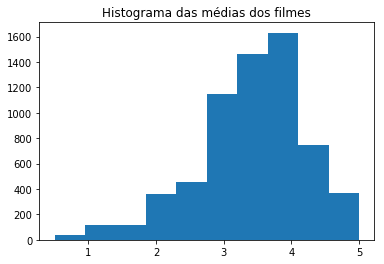

In [27]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [32]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [33]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
# primeiro grau
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau # categorica ordinal

In [0]:
# budget => orcamento => quantitativa continuo 

In [0]:
# quantidade de votos => 1, 2, 3, 4, nao tem 2.5 votos.
# notas do movielens => 0.5, 1, 1.5, ... ,5 nao tem 2.7

In [37]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ta', 'ro', 'cs', 'id', 'ar', 'vi',
       'nb', 'no', 'af', 'te', 'ps', 'xx', 'sl', 'hu', 'pl', 'is', 'ky', 'el',
       'tr'],
      dtype='object')

In [38]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [39]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


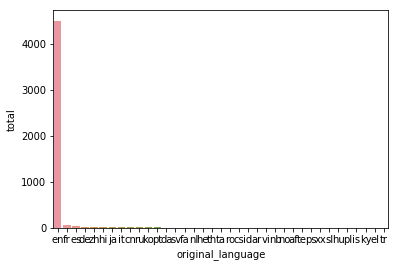

In [40]:
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

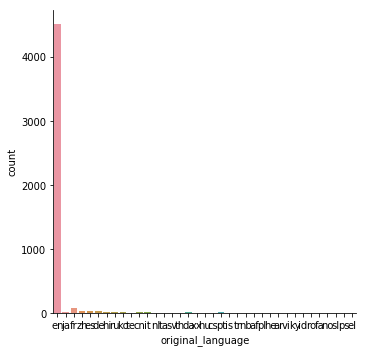

In [41]:
sns.catplot(x = "original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f2c17ecc860>,
 [Text(-1.07917,0.213055,'en'),
  Text(1.03554,-0.371034,'fr'),
  Text(1.05797,-0.301172,'es'),
  Text(1.0688,-0.260129,'de'),
  Text(1.07732,-0.222224,'zh'),
  Text(1.08352,-0.189714,'hi'),
  Text(1.08758,-0.164861,'ja'),
  Text(1.0906,-0.14349,'it'),
  Text(1.09288,-0.124923,'cn'),
  Text(1.09464,-0.108468,'ru'),
  Text(1.09609,-0.0927053,'ko'),
  Text(1.09721,-0.078359,'pt'),
  Text(1.09797,-0.0668722,'da'),
  Text(1.09846,-0.0582522,'sv'),
  Text(1.09878,-0.0517848,'fa'),
  Text(1.09904,-0.0460345,'nl'),
  Text(1.09924,-0.041002,'he'),
  Text(1.09939,-0.0366877,'th'),
  Text(1.0995,-0.033092,'ta'),
  Text(1.09958,-0.0302152,'ro'),
  Text(1.09966,-0.0273382,'cs'),
  Text(1.09973,-0.024461,'id'),
  Text(1.09979,-0.0215836,'ar'),
  Text(1.09983,-0.0194255,'vi'),
  Text(1.09985,-0.0179867,'nb'),
  Text(1.09988,-0.0165479,'no'),
  Text(1.0999,-0.015109,'af'),
  Text(1.09992,-0.0136702,'te'),
  Text(1.09993,-0.0122313,'ps'),
  Text(1.09995,

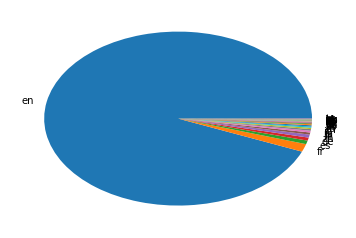

In [42]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [43]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


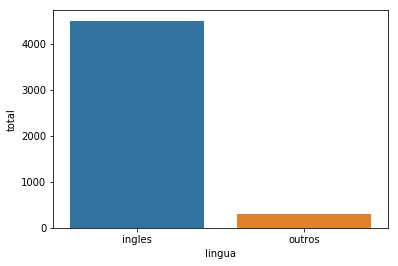

In [44]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data = dados)

([<matplotlib.patches.Wedge at 0x7f2c17dd1c88>,
 [Text(-1.07917,0.213055,'ingles'), Text(1.07917,-0.213056,'outros')])

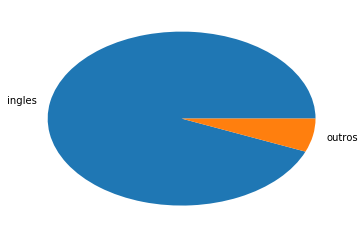

In [45]:
plt.pie(dados["total"], labels = dados["lingua"])

In [46]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
cs     2
ar     2
ta     2
id     2
el     1
xx     1
is     1
ky     1
hu     1
sl     1
nb     1
tr     1
af     1
te     1
ps     1
pl     1
vi     1
no     1
Name: original_language, dtype: int64

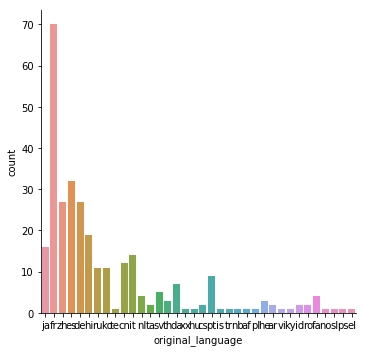

In [47]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x = "original_language", kind="count",
              data = filmes_sem_lingua_original_em_ingles)

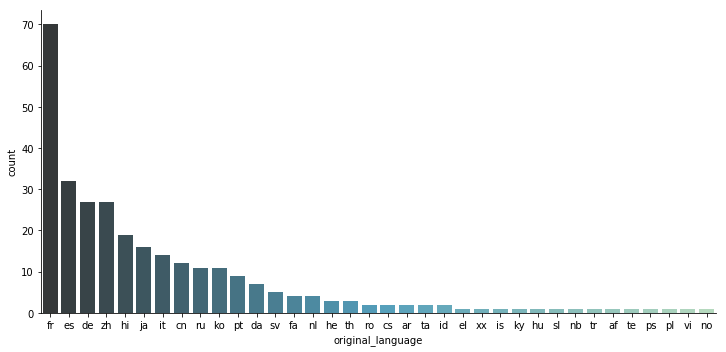

In [48]:
sns.catplot(x = "original_language", kind="count",
              data = filmes_sem_lingua_original_em_ingles,
              aspect = 2,
              palette="GnBu_d",
              order = total_por_lingua_de_outros_filmes.index)

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma

In [50]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [53]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

107 45


In [56]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.90
Nota média do Jumanji 3.37


In [91]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.881514342815627 0.9132857762447136


In [57]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


In [0]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [92]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

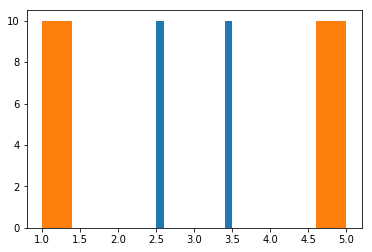

In [80]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c17b1aa58>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c17b234a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c17aac160>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c17b23cf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c17b1aba8>,
  <matplotlib.lines.Line2D at 0x7f2c17aacdd8>]}

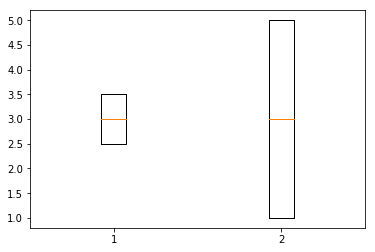

In [82]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f2c1798d780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c179a01d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c179a0e48>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c179a0a20>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c1798d8d0>,
  <matplotlib.lines.Line2D at 0x7f2c1792bb00>]}

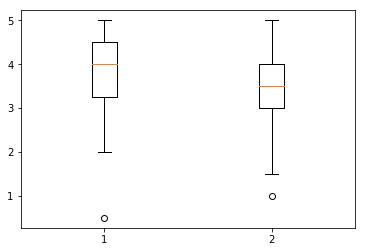

In [85]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

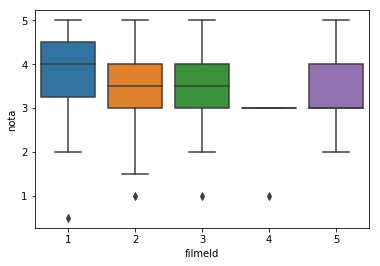

In [88]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))